<a href="http://www.datascience-paris-saclay.fr">
<img src="img/logoUPSayPlusCDS_990.png" width="600px">
</a>

# Pre-PLAsTiCC - RAMP: classification of astronomical transients
## This notebook only allows you to read the data with 3 subclasses using the Kessler 2010 data - for the complete RAMP notebook see [this link](https://github.com/ramp-kits/supernovae/blob/master/PLAsTiCC_starting_kit.ipynb)

##### Alexandre Boucaud (Paris-Saclay Center for Data Science)
##### Emille E. O. Ishida (Universite Clermont-Auvergne)

##  Data



The lightcurve data is made of **non-homogeneously sampled**, **non-periodic** time series with correlated errors obtained in several wavelength filters.

The DES dataset provided has light curves in 4 filters *g*, *r*, *i* and *z*.

### Reading the data

Here we provide methods to read the `pickle` files and convert the data to a `pandas` dataframe for convenience.

The SN label is removed from the main dataframe and provided as a separate one.

In [16]:
import gzip
import pickle
import pandas as pd
import numpy as np


def read_data(filename):
    """Read data from pickled file to a pandas dataframe"""
    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)

    X = to_dataframe(data)
    y = pd.get_dummies(X.type)
    X = X.drop(columns=['comment', 'type'])

    return X, y


def to_dataframe(data):
    """Converts from a python dictionary to a pandas dataframe"""
    for idx in data:
        sn = data[idx]
        for filt in 'griz':
            sn['mjd_%s' % filt] = np.array(sn[filt]['mjd'])
            sn['fluxcal_%s' % filt] = np.array(sn[filt]['fluxcal'])
            sn['fluxcalerr_%s' % filt] = np.array(sn[filt]['fluxcalerr'])
            del sn[filt]
        sn.update(sn['header'])
        del sn['header']

    return pd.DataFrame.from_dict(data, orient='index')

### Read the training data

In [17]:
X, y = read_data('data/des_train.pkl')

In [18]:
# 5 first rows of the dataframe
X.head()

,mjd_g,fluxcal_g,fluxcalerr_g,mjd_r,fluxcal_r,fluxcalerr_r,mjd_i,fluxcal_i,fluxcalerr_i,mjd_z,fluxcal_z,fluxcalerr_z,snid,z,pkmjd,pkmag_g,pkmag_r,pkmag_i,pkmag_z
1186,"[56283.203, 56288.199, 56292.098, 56304.051, 5...","[3.182, -13.07, -7.177, -0.4645, 0.2906, 16.63...","[6.285, 11.79, 11.65, 2.479, 7.569, 6.195, 3.6...","[56283.211, 56288.215, 56292.102, 56304.055, 5...","[-4.973, -6.427, 9.861, -1.663, 6.724, 23.82, ...","[3.326, 6.181, 4.83, 1.657, 2.966, 2.553, 3.07...","[56283.215, 56289.109, 56292.191, 56304.07, 56...","[-0.615, -9.294, 0.8371, 0.6895, -1.593, 24.51...","[5.816, 7.082, 5.599, 2.506, 5.021, 3.699, 4.5...","[56283.223, 56289.125, 56292.199, 56304.086, 5...","[11.06, 9.393, 3.887, -0.519, 7.005, 33.13, 94...","[5.047, 5.425, 5.158, 3.934, 5.43, 4.443, 7.02...",1186,0.3698,56335.335938,23.07,22.27,22.21,22.43
1292,"[56177.172, 56179.172, 56187.156, 56189.148, 5...","[27.18, 34.83, 24.15, 34.06, 20.13, 5.124, 2.7...","[4.837, 2.372, 1.805, 9.802, 3.809, 2.291, 1.5...","[56177.188, 56179.312, 56187.172, 56189.16, 56...","[33.02, 34.65, 26.92, 33.84, 18.57, 17.39, 17....","[5.375, 3.109, 1.365, 3.938, 2.385, 1.643, 1.1...","[56177.203, 56179.328, 56187.188, 56189.176, 5...","[49.55, 42.79, 30.72, 34.43, 23.86, 14.07, 12....","[5.519, 4.282, 1.993, 8.104, 8.079, 2.161, 1.4...","[56177.234, 56179.359, 56187.211, 56189.203, 5...","[49.68, 48.62, 42.8, 43.68, 33.21, 27.07, 21.5...","[4.784, 3.636, 2.322, 4.765, 5.671, 2.26, 1.86...",1292,0.3501,56164.195312,23.44,23.36,23.35,23.12
2542,"[56176.191, 56179.188, 56180.266, 56188.16, 56...","[6.955, 21.06, 24.68, 31.91, 27.69, 22.4, 13.2...","[4.773, 2.635, 2.617, 5.746, 2.38, 2.698, 4.80...","[56176.199, 56179.195, 56180.281, 56188.176, 5...","[38.23, 49.79, 54.4, 86.6, 80.42, 73.66, 56.32...","[2.257, 1.963, 1.675, 5.829, 3.629, 2.059, 2.5...","[56176.215, 56179.234, 56180.297, 56188.211, 5...","[36.53, 48.08, 55.75, 70.12, 78.81, 71.36, 68....","[3.225, 2.191, 3.837, 4.723, 9.182, 2.675, 4.3...","[56176.238, 56179.266, 56180.328, 56188.238, 5...","[29.16, 46.65, 45.53, 64.54, 77.19, 75.92, 62....","[2.545, 3.832, 4.569, 3.611, 3.302, 2.779, 2.9...",2542,0.5415,56192.007812,24.17,22.79,22.81,22.85
2598,"[56248.324, 56258.215, 56261.098, 56273.16, 56...","[1.006, -4.694, -2.976, -1.77, 19.69, 61.47, 6...","[1.701, 4.948, 8.828, 1.752, 2.131, 5.026, 6.6...","[56248.34, 56258.227, 56261.102, 56273.176, 56...","[-3.556, -3.604, -5.289, 1.965, 22.99, 84.78, ...","[1.337, 2.382, 3.395, 1.214, 1.358, 2.664, 3.3...","[56258.035, 56261.125, 56273.188, 56281.203, 5...","[22.24, 3.958, -0.1393, 23.06, 90.29, 93.4, 12...","[9.893, 3.854, 2.023, 1.858, 3.509, 5.387, 3.5...","[56258.066, 56261.156, 56273.219, 56281.227, 5...","[4.218, 1.312, 0.01804, 25.39, 87.45, 116.4, 1...","[3.968, 3.086, 2.251, 2.342, 3.062, 3.001, 3.2...",2598,0.3513,56301.996094,22.46,22.02,21.94,22.21
3644,"[56177.172, 56179.172, 56187.156, 56189.148, 5...","[10.03, 3.29, 25.31, 52.93, 137.8, 113.8, 66.4...","[4.792, 2.242, 1.817, 9.857, 4.69, 3.219, 2.12...","[56177.188, 56179.312, 56187.172, 56189.16, 56...","[3.537, 10.17, 45.56, 59.92, 111.3, 139.9, 124...","[5.336, 3.038, 1.537, 4.06, 3.17, 3.089, 2.598...","[56177.203, 56179.328, 56187.188, 56189.176, 5...","[-2.231, 3.372, 28.65, 42.03, 151.9, 155.9, 14...","[5.436, 4.201, 1.98, 8.119, 8.558, 3.634, 3.05...","[56177.234, 56179.359, 56187.211, 56189.203, 5...","[-0.1238, -3.598, 15.7, 14.39, 136.5, 142.2, 1...","[4.691, 3.518, 2.197, 4.702, 6.187, 3.451, 2.9...",3644,0.2705,56204.546875,22.18,22.13,22.00,22.15


And the labels, converted to a vector form

In [4]:
y.head()

,II,Ia,Ibc
1186,0,1,0
1292,1,0,0
2542,0,1,0
2598,0,1,0
3644,1,0,0


In the DataFrame, each supernova is indexed by its ID

In [5]:
X.head().index

Int64Index([1186, 1292, 2542, 2598, 3644], dtype='int64')

and can be accessed via the `loc` accessor

In [6]:
# SN 1186
X.loc[1186]

mjd_g           [56283.203, 56288.199, 56292.098, 56304.051, 5...
fluxcal_g       [3.182, -13.07, -7.177, -0.4645, 0.2906, 16.63...
fluxcalerr_g    [6.285, 11.79, 11.65, 2.479, 7.569, 6.195, 3.6...
mjd_r           [56283.211, 56288.215, 56292.102, 56304.055, 5...
fluxcal_r       [-4.973, -6.427, 9.861, -1.663, 6.724, 23.82, ...
fluxcalerr_r    [3.326, 6.181, 4.83, 1.657, 2.966, 2.553, 3.07...
mjd_i           [56283.215, 56289.109, 56292.191, 56304.07, 56...
fluxcal_i       [-0.615, -9.294, 0.8371, 0.6895, -1.593, 24.51...
fluxcalerr_i    [5.816, 7.082, 5.599, 2.506, 5.021, 3.699, 4.5...
mjd_z           [56283.223, 56289.125, 56292.199, 56304.086, 5...
fluxcal_z       [11.06, 9.393, 3.887, -0.519, 7.005, 33.13, 94...
fluxcalerr_z    [5.047, 5.425, 5.158, 3.934, 5.43, 4.443, 7.02...
snid                                                         1186
z                                                          0.3698
pkmjd                                                     56335.3
pkmag_g   

or via positional indexing with the `iloc` accessor.

In [7]:
# Also SN 1186
sn0 = X.iloc[0]

Here is a method to visualize the data

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

DES_FILTERS = 'griz'

def plot_lightcurves(idx):
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))
    for id_f, f in enumerate(DES_FILTERS):
        ax = axes[id_f // 2, id_f % 2]
        ax.errorbar(X.iloc[idx]['mjd_%s' % f], 
                    X.iloc[idx]['fluxcal_%s' % f], 
                    X.iloc[idx]['fluxcalerr_%s' % f], 
                    fmt='o')
        ax.set_xlabel('MJD')
        ax.set_ylabel('Calibrated flux')
        ax.set_title('%s-band' % f)

Use this method to look at the raw light curves

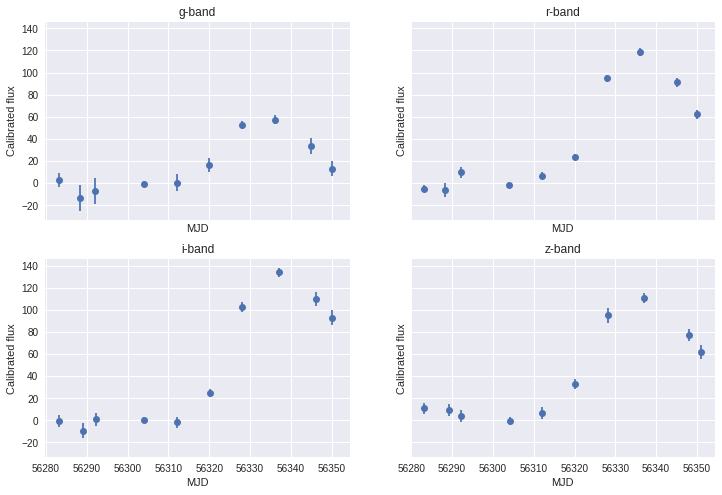

In [9]:
plot_lightcurves(0)

## Starting kit pipeline elements

For this classification challenge, participants are required to submit two files:
* `feature_extractor.py` 
* `classifier.py`     

In the following, we will go through the process of designing a baseline submission, that is writing the script for both the pre-processing step and the classification step.

### Pre-processing - a.k.a. feature extraction

As the SN data is highly non-homogeneous a little pre-processing need to be done. In the example below we fit the data using a parametric function proposed by [Bazin et al., 2009](https://arxiv.org/pdf/0904.1066.pdf):

$$ f(t) = A \frac{\exp\left(-\frac{t - t_0}{\tau_{fall}}\right)}{1 + \exp\left(\frac{t - t_0}{\tau_{rise}}\right)}  + B$$

In [10]:
def bazin(time, A, B, t0, tfall, trise):
    X = np.exp(-(time - t0) / tfall) / (1 + np.exp((time - t0) / trise))
    return A * X + B

Although this parametric form does not have a physical motivation, it reproduces quiet well the behavior of most light curves.  

<div class="alert alert-warning">
<b>NOTE</b>  
This function is very sensitive to the magnitude of the time of observation. The use of [Modified Julian Date](https://bowie.gsfc.nasa.gov/time/) creates large time values, which are not relevant for such analysis so we use a scaled time instead in order to ensure the convergence of the fit.
</div>


We provide an example fitting function, so you can fit a light curve and plot reslts as follows:

In [11]:
from scipy.optimize import least_squares

def lightcurve_fit(time, flux):
    scaled_time = time - time.min()
    t0 = scaled_time[flux.argmax()]
    guess = (0, 0, t0, 40, -5)

    errfunc = lambda params: abs(flux - bazin(scaled_time, *params))

    result = least_squares(errfunc, guess, method='lm')

    return result.x

The parametric fit on the light curves yields 5 parameters for each filter $A, B, t_0, \tau_{fall}, \tau_{rise}$.

In [12]:
lightcurve_fit(sn0.mjd_g, sn0.fluxcal_g)

array([132.37309421,  -5.3858553 ,  47.36812147,  10.92992312,
        -3.95247408])

In [13]:
def plot_lightcurves_with_fit(idx):
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))
    for id_f, f in enumerate(DES_FILTERS):
        ax = axes[id_f // 2, id_f % 2]
        
        time = X.iloc[idx]['mjd_%s' % f]
        flux = X.iloc[idx]['fluxcal_%s' % f]
        
        fit = lightcurve_fit(time, flux)
        stime = np.arange(time.min(), time.max())
        
        ax.plot(time, flux, 'o')
        ax.plot(stime, bazin(stime - stime.min(), *fit))
        ax.set_xlabel('MJD')
        ax.set_ylabel('Calibrated flux')
        ax.set_title('%s-band' % f)

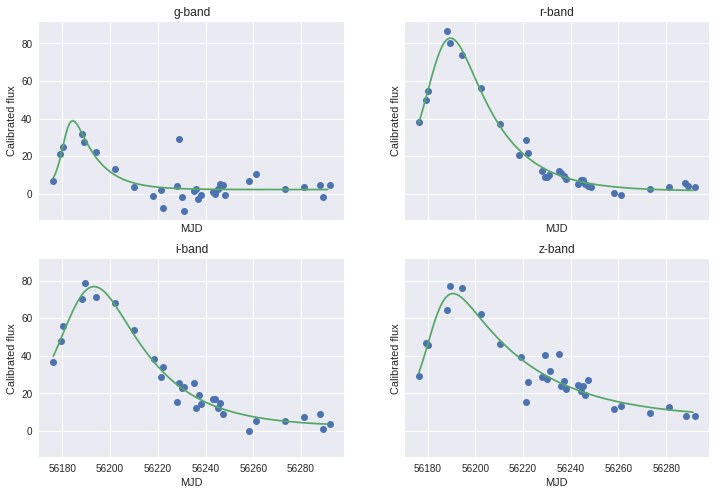

In [14]:
plot_lightcurves_with_fit(2)

### Analogously you can read the test data

In [21]:
X1, y1 = read_data('data/des_target.pkl')

In [24]:
X1.head()

,mjd_g,fluxcal_g,fluxcalerr_g,mjd_r,fluxcal_r,fluxcalerr_r,mjd_i,fluxcal_i,fluxcalerr_i,mjd_z,fluxcal_z,fluxcalerr_z,snid,z,pkmjd,pkmag_g,pkmag_r,pkmag_i,pkmag_z
17,"[56171.051, 56179.023, 56180.031, 56188.004, 5...","[-36.79, 6.122, 2.865, 5.279, 5.93, -13.35, -2...","[78.09, 6.377, 5.671, 5.677, 5.647, 6.204, 18....","[56172.039, 56179.031, 56180.047, 56188.016, 5...","[4.41, -3.697, 1.002, 0.5595, 4.916, 3.12, -4....","[17.58, 4.331, 4.492, 4.368, 4.331, 3.584, 9.0...","[56172.051, 56179.047, 56180.062, 56188.027, 5...","[0.6447, 14.39, 10.95, 3.962, 11.08, 4.648, -0...","[49.95, 7.145, 6.74, 6.462, 6.409, 6.148, 11.8...","[56176.16, 56179.062, 56180.078, 56188.035, 56...","[1.337, 5.544, -1.652, -4.632, 8.298, -8.15, -...","[3.581, 8.139, 10.16, 6.472, 6.408, 15.08, 7.6...",17,0.3972,56214.511719,26.78,28.54,28.42,26.27
19,"[56221.004, 56222.016, 56229.012, 56231.012, 5...","[1.325, 10.68, -12.38, -0.7444, -16.28, -1.846...","[5.225, 6.245, 9.82, 6.914, 5.18, 3.612, 4.182...","[56221.016, 56222.027, 56229.016, 56231.02, 56...","[2.468, -9.936, -5.602, -3.687, -1.04, -0.4602...","[3.577, 3.623, 4.318, 2.784, 5.378, 2.785, 2.8...","[56221.027, 56222.035, 56229.023, 56231.027, 5...","[-9.62, -0.9565, -2.845, 1.944, -7.399, -3.144...","[5.473, 4.921, 7.807, 4.071, 7.62, 4.81, 4.408...","[56221.035, 56228.012, 56230.012, 56235.02, 56...","[-7.9, -1.675, 6.876, 0.7848, 9.817, 0.539, 10...","[5.405, 5.545, 4.915, 5.689, 5.126, 5.345, 3.5...",19,0.9674,56297.375000,25.76,23.88,24.26,24.11
126,"[56194.258, 56202.16, 56210.172, 56218.172, 56...","[0.5652, -1.158, -0.9069, 0.5285, 1.824, -3.85...","[2.636, 4.79, 3.69, 1.249, 3.91, 5.909, 7.693,...","[56194.27, 56202.176, 56210.188, 56218.191, 56...","[-1.709, -5.724, 1.963, -0.6326, 3.538, -1.682...","[1.486, 2.324, 3.215, 0.956, 5.581, 2.626, 2.3...","[56194.285, 56202.191, 56210.203, 56218.211, 5...","[-4.059, 1.535, -0.9864, -1.017, -3.082, -0.24...","[2.292, 4.162, 3.208, 1.499, 4.482, 3.322, 5.1...","[56194.305, 56202.215, 56210.234, 56219.156, 5...","[-2.55, 0.1151, 0.4349, 2.099, 18.6, -2.833, -...","[2.384, 2.711, 3.845, 1.933, 14.4, 5.055, 4.13...",126,0.5621,56255.121094,25.15,24.61,24.99,25.02
172,"[56177.172, 56179.172, 56187.156, 56189.148, 5...","[8.814, 9.327, 25.14, 4.583, 14.75, 4.514, 3.9...","[4.79, 2.25, 1.815, 9.785, 3.799, 2.29, 1.606,...","[56177.188, 56179.312, 56187.172, 56189.16, 56...","[-6.07, -1.459, 1.734, 12.94, 24.37, 15.21, 16...","[5.335, 3.03, 1.254, 3.887, 2.402, 1.635, 1.14...","[56177.203, 56179.328, 56187.188, 56189.176, 5...","[3.05, 0.8958, 7.507, 3.853, 19.84, 19.4, 16.5...","[5.436, 4.199, 1.904, 8.072, 8.075, 2.175, 1.4...","[56177.234, 56179.359, 56187.211, 56189.203, 5...","[-0.6383, -0.6604, 12.9, 20.37, 23.72, 24.25, ...","[4.691, 3.517, 2.19, 4.708, 5.654, 2.249, 1.87...",172,0.4458,56203.925781,25.26,24.38,24.43,24.11
303,"[56188.148, 56194.145, 56207.188, 56215.195, 5...","[-25.75, -2.684, -3.577, 2.366, -6.99, -0.0593...","[17.96, 4.678, 4.366, 2.681, 6.269, 7.729, 12....","[56188.289, 56194.156, 56207.195, 56215.203, 5...","[0.5207, -3.778, 1.138, 2.289, -4.397, 9.484, ...","[3.995, 2.752, 3.459, 2.172, 5.079, 5.697, 5.5...","[56188.297, 56194.172, 56207.203, 56215.211, 5...","[-9.986, 0.4815, -14.14, 0.4821, -8.719, -0.27...","[8.134, 4.627, 6.252, 2.633, 5.578, 16.98, 12....","[56188.312, 56194.188, 56207.219, 56215.227, 5...","[-3.335, -5.354, -8.832, 3.344, -8.594, -4.714...","[5.393, 4.463, 5.954, 3.426, 7.707, 8.065, 6.6...",303,0.9024,56263.945312,98.99,25.88,24.39,24.25


In [23]:
y1.head()

,II,Ia,Ibc
17,1,0,0
19,1,0,0
126,1,0,0
172,1,0,0
303,0,0,1
